In [1]:
# INSTRUCTIONS
#Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) 
#that showcases the relationship between four key variables:
#* Average Fare ($) Per City
#* Total Number of Rides Per City
#* Total Number of Drivers Per City
#* City Type (Urban, Suburban, Rural)

#In addition, you will be expected to produce the following three pie charts:
#* % of Total Fares by City Type
#* % of Total Rides by City Type
#* % of Total Drivers by City Type

# THREE OBSERVATIONS: 
# (1) As would be expected, there are significantly more drivers and rides in the urban areas.
# (2) The rural area cities get 5.3% of the total rides, but 6.7% of the total fare. 
#     This is the most favorable ride-to-fare ratio for would-be drivers. 
# (3) The average fare increases with the decrease of # of rides. 

In [2]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load CSV
city_data = "raw_data/city_data.csv"
ride_data = "raw_data/ride_data.csv"

In [4]:
# Read with pandas- city
city_df = pd.read_csv(city_data)
city_df.head()

# Clean up assistance with Luis... to address repeat of some city info... 
city_df_clean = pd.DataFrame({'type': city_df.groupby('city').first()['type'],
                                'driver_count': city_df.groupby('city').sum()['driver_count']}).reset_index()
city_df_clean.head(2)

,city,driver_count,type
0,Alvarezhaven,21,Urban
1,Alyssaberg,67,Urban


In [5]:
# Read with pandas- ride
ride_df = pd.read_csv(ride_data)
ride_df.head(2)

#ride_df["city"].value_Counts()


,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942


In [6]:
#* Average Fare ($) Per City
ave_fare_per_city = ride_df.groupby("city").mean()["fare"]
ave_fare_per_city.head(2)

city
Alvarezhaven    23.928710
Alyssaberg      20.609615
Name: fare, dtype: float64

In [7]:
#* Total Number of Rides Per City
rides_per_city = ride_df.groupby("city").count()["ride_id"]
rides_per_city.head(2)

city
Alvarezhaven    31
Alyssaberg      26
Name: ride_id, dtype: int64

In [8]:
#* Total Number of Drivers Per City
# Notes to self.... Plan -- create a pd.DataFrame for Ave fare per city and rides per city and then merge those into the city DF 
#because that is already grouped by City... may need to reset index -- this should leave us with a single dataframe to plot -- 
#(Luis indicated that it would be OK to merge the files initially and then just clean up the repetitive lists, but using .first 
# and .sum, and then reset the index just before the plot)  

fare_and_rides = pd.DataFrame({"Ave_Fare":ave_fare_per_city, "# of Rides": rides_per_city})
fare_and_rides = fare_and_rides.reset_index()
fare_and_rides.head(2)


,city,# of Rides,Ave_Fare
0,Alvarezhaven,31,23.928710
1,Alyssaberg,26,20.609615


In [9]:
# Merge new data to city date
merged_df = pd.merge(city_df_clean,fare_and_rides,on="city")
merged_df.head(2)

,city,driver_count,type,# of Rides,Ave_Fare
0,Alvarezhaven,21,Urban,31,23.928710
1,Alyssaberg,67,Urban,26,20.609615


In [10]:
urban = merged_df.loc[(merged_df["type"]== "Urban")]
urban.head(2)

,city,driver_count,type,# of Rides,Ave_Fare
0,Alvarezhaven,21,Urban,31,23.928710
1,Alyssaberg,67,Urban,26,20.609615


In [11]:
suburban = merged_df.loc[(merged_df["type"]== "Suburban")]
suburban.head(2)

,city,driver_count,type,# of Rides,Ave_Fare
2,Anitamouth,16,Suburban,9,37.315556
6,Campbellport,26,Suburban,15,33.711333


In [12]:
rural = merged_df.loc[(merged_df["type"]== "Rural")]
# Did the following line to check to make sure the sizing works
#rural.loc[(rural["# of Rides"]==4)]
rural.head(2)

,city,driver_count,type,# of Rides,Ave_Fare
17,East Leslie,9,Rural,11,33.660909
18,East Stephen,6,Rural,10,39.053000


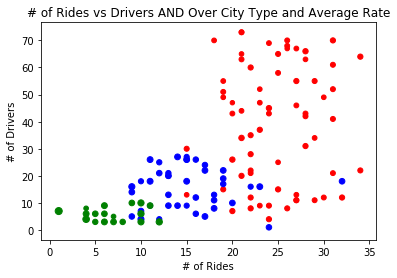

In [13]:
# Note to self -- Using the matplotlib way did not allow me to overlay the graphs in single location
#urban.plot(kind="scatter", x="# of Rides", y="driver_count", color="r")
#suburban.plot(kind="scatter", x="# of Rides", y="driver_count", color="b")
#rural.plot(kind="scatter", x="# of Rides", y="driver_count", color="g")
#plt.show()

# create indiv scatter plots for each city type
plt.scatter(urban["# of Rides"],urban["driver_count"], color="r", s = urban["Ave_Fare"])
plt.scatter(suburban["# of Rides"],suburban["driver_count"], color="b", s = suburban["Ave_Fare"])
plt.scatter(rural["# of Rides"],rural["driver_count"], color="g", s = rural["Ave_Fare"])

# Note to self -- Problem with creation of  / implementation of handle for each plot... for line graph only?
#urban, = plt.plot(urban["# of Rides"],urban["driver_count"], color="r")
#suburban, = plt.plot(suburban["# of Rides"],suburban["driver_count"], color="b")
#rural, = plt.plot(rural["# of Rides"],rural["driver_count"], color="g")


# create chart labels and legend
plt.title("# of Rides vs Drivers AND Over City Type and Average Rate")
plt.xlabel("# of Rides")
plt.ylabel("# of Drivers")
#plt.legend(urban.color = "red", suburban.color = blue, rural.color = green, loc="best")
plt.savefig("Dow-Rides-vs-Drivers-Fare-City-Type.png")
plt.show()

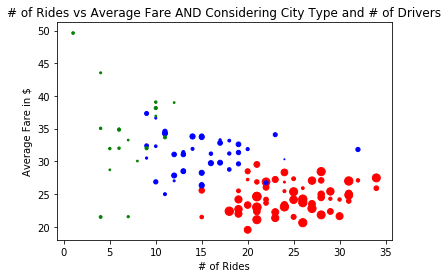

In [14]:
# Version two of the graph - now with average rate on y-axis:

# create indiv scatter plots for each city type
plt.scatter(urban["# of Rides"],urban["Ave_Fare"], color="r", s = urban["driver_count"])
plt.scatter(suburban["# of Rides"],suburban["Ave_Fare"], color="b", s = suburban["driver_count"])
plt.scatter(rural["# of Rides"],rural["Ave_Fare"], color="g", s = rural["driver_count"])


# create chart labels and legend
plt.title("# of Rides vs Average Fare AND Considering City Type and # of Drivers")
plt.xlabel("# of Rides")
plt.ylabel("Average Fare in $")
plt.savefig("Dow-Rides-vs-Fare-Drivers-City-Type.png")
plt.show()

In [15]:
#* % of Total Fares by City Type
sum_fare_urban = round(urban["Ave_Fare"] * urban["# of Rides"]).sum()
sum_fare_urban


40077.0

In [16]:
sum_fare_suburban = round(suburban["Ave_Fare"] * suburban["# of Rides"]).sum()
sum_fare_suburban

19321.0

In [17]:
sum_fare_rural = round(rural["Ave_Fare"] * rural["# of Rides"]).sum()
sum_fare_rural

4255.0

In [18]:
total_fare = ride_df.sum()["fare"]
total_fare

63651.30999999986

In [19]:
# Not needed
#percent_fare_urban = int((sum_fare_urban / total_fare)*100)
#percent_fare_urban
#percent_fare_suburban = int((sum_fare_suburban / total_fare)*100)
#percent_fare_suburban
#percent_fare_rural = int((sum_fare_rural / total_fare)*100)
#percent_fare_rural

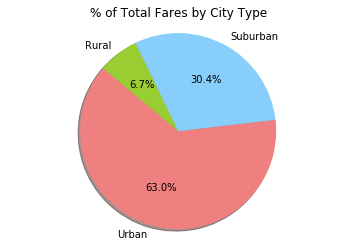

In [20]:
#fares_pie_data = [percent_fare_urban,percent_fare_suburban,percent_fare_rural]

fares_pie_data = [sum_fare_urban,sum_fare_suburban,sum_fare_rural]
fares_pie_labels = ["Urban", "Suburban", "Rural"]
colors = ["lightcoral", "lightskyblue", "yellowgreen"]

plt.title("% of Total Fares by City Type")
plt.pie(fares_pie_data,labels=fares_pie_labels,colors=colors,autopct="%1.1f%%",shadow=True,startangle=140)
plt.axis("equal")
plt.savefig("Dow-Percent-Total-Fares-by-City-Type.png")

In [21]:
#* % of Total Rides by City Type
sum_rides_urban=urban["# of Rides"].sum()
sum_rides_suburban=suburban["# of Rides"].sum()                        
sum_rides_rural=rural["# of Rides"].sum()  

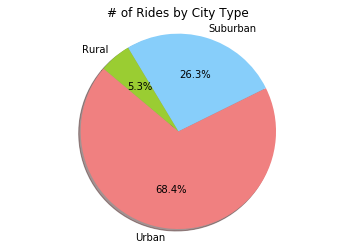

In [22]:
rides_pie_data = [sum_rides_urban,sum_rides_suburban,sum_rides_rural]
rides_pie_labels = ["Urban", "Suburban", "Rural"]
colors = ["lightcoral", "lightskyblue", "yellowgreen"]

plt.title("# of Rides by City Type")
plt.pie(rides_pie_data,labels=rides_pie_labels,colors=colors,autopct="%1.1f%%",shadow=True,startangle=140)
plt.axis("equal")
plt.savefig("Dow-Percent-Total-Rides-by-City-Type.png")

In [23]:
#* % of Total Drivers by City Type
sum_drivers_urban=urban["driver_count"].sum()
sum_drivers_suburban=suburban["driver_count"].sum()                        
sum_drivers_rural=rural["driver_count"].sum()  

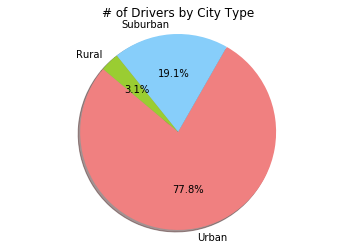

In [24]:
drivers_pie_data = [sum_drivers_urban,sum_drivers_suburban,sum_drivers_rural]
drivers_pie_labels = ["Urban", "Suburban", "Rural"]
colors = ["lightcoral", "lightskyblue", "yellowgreen"]

plt.title("# of Drivers by City Type")
plt.pie(drivers_pie_data,labels=drivers_pie_labels,colors=colors,autopct="%1.1f%%",shadow=True,startangle=140)
plt.axis("equal")
plt.savefig("Dow-Percent-Total-Drivers-by-City-Type.png")